# Modeling Distributions

### Introduction

Now so far we have seen how to work with probability distributions that we derived directly from the sample of our population.  Our model of our probability distribution function of our random variable simply equaled the relative frequencies in our sample.  In this lesson, we'll see the limitations of this approach, and how we can improve upon it.

### Loading the data

Let's begin by loading up our data, and then we can plot our distribution function.

In [1]:
import pandas as pd 
url = "https://raw.githubusercontent.com/jigsawlabs-student/modeling-distributions/master/scores_grade_eight_2015.csv"
df = pd.read_csv(url, index_col = 0)

In [2]:
df.shape

(472, 8)

We'll imagine that we can only select a sample from our data.  We use numpy to do so.

In [4]:
from numpy.random import default_rng, seed
seed(3)
rng = default_rng()
numbers = rng.choice(range(0, 471), size=100, replace=False)

numbers = sorted(numbers)

sample_df = df.iloc[numbers]

In [7]:
avg_score = sample_df['Mean Scale Score']

Text(0.5, 1.0, 'average math scores')

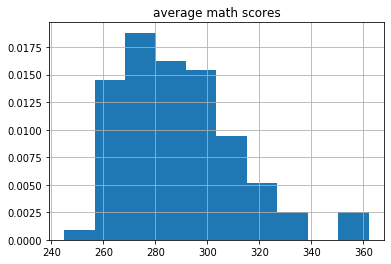

In [8]:
import matplotlib.pyplot as plt
ax = avg_score.hist(density = True)
ax.set_title('average math scores')


The above is our probability density function.

Now, one problem with the above, is that we don't really *believe* the probability density function above.  After all, do we really believe that $P(X = 340) = 0$, as displayed above?  Probably not.

Instead, we **use our sample to create a model of the distribution**.  We do so with one of some predefined distributions.  For the data above, it looks like the normal distribution can do a pretty good job.

<img src="./normal-dist.png" width="60%">

You may have seen the normal distribution before.  The normal distribution is the bell curve.  It's symmetric about the mean and it's PDF returns smaller and smaller probabilities the further it gets from the mean.  We can plot it using scipy like so.

In [11]:
import scipy.stats as stats
import numpy as np
norm_dist = stats.norm()

First we initialize a model of the normal distribution.

Then we can find what value is that one percentile like so.

In [17]:
norm_dist.ppf(0.01)

-2.3263478740408408

Or the 99th percentile.

In [18]:
norm_dist.ppf(0.99)

2.3263478740408408

And for any value of $x$ we can use the pdf function to find the probability that the value occurs.

In [21]:
norm_dist.pdf(1)

0.24197072451914337

So we create a range of 100 values between our one percentile, and 99th percentile.

In [22]:
x = np.linspace(norm_dist.ppf(0.01), norm_dist.ppf(0.99), 100)

And then we find the corresponding probabilities for each value.

In [23]:
pdf_nums_norm = norm_dist.pdf(x)

In [24]:
x[:4], pdf_nums_norm[:4]

(array([-2.32634787, -2.27935095, -2.23235402, -2.18535709]),
 array([0.02665214, 0.0296985 , 0.03302004, 0.03663206]))

Then we can plot our x values and corresponding probabilities to plot a pdf of the normal distribution.

[Text(0.5, 1.0, 'normal distribution')]

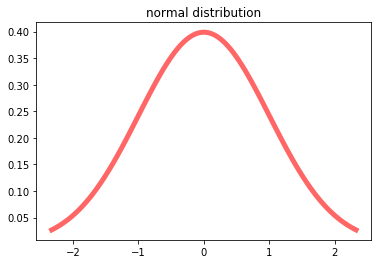

In [25]:
from scipy.stats import norm
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pdf_nums_norm,
'r-', lw=5, alpha=0.6, label='norm pdf')
ax.set(title = 'normal distribution')

So above is the above is the standard normal distribution.  The standard normal distribution has a mean of 0, and a standard deviation of 1.

### From sample to model

Now let's use the normal distribution to model distribution of math scores among NYC schools.  To do so, we'll want to create a normal distribution, with the same location and spread in our NYC school sample.

In [129]:
df['Mean Scale Score'].mean()

290.72281449893393

In [130]:
df['Mean Scale Score'].std()

20.553659493078015

Now we can create initialize a normal distribution with these same parameters.

In [33]:
school_scores_norm = stats.norm(df['Mean Scale Score'].mean(), df['Mean Scale Score'].std())

And then plot this distribution like so.

In [34]:
x_schools = np.linspace(school_scores_norm.ppf(0.001), school_scores_norm.ppf(0.999), 100)
school_scores_norm = school_scores_norm.pdf(x_schools)

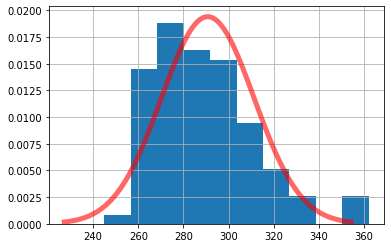

In [35]:
from scipy.stats import norm
import matplotlib.pyplot as plt
fig_schools = plt.figure()
ax_schools = fig_schools.add_subplot(111)
ax_schools = avg_score.hist(density = True)

ax_schools.plot(x_schools, school_scores_norm,
'r-', lw=5, alpha=0.6, label='norm pdf')

This looks *pretty* good.

> Notice that we have this `schools_score_norm`, is also what we get with the `stats.norm.fit` function. 

In [149]:
stats.norm.fit(df['Mean Scale Score'].dropna())

(290.72281449893393, 20.531735583379273)

Ok, now *instead of using our sample, we can use this model*.

For example, let's see the likelihood that a school has a score **that equals 310**.

In [156]:
school_scores_norm.pdf(310)

0.012502813816575269

> So we use the `pdf` function to find the corresponding value.

And what about the probability that a school has less than 310.

In [157]:
school_scores_norm.cdf(310)

0.8258509514271425

So there is a $.82$ probability that a school's score is less than 310.

Let's compare this with our actual values in our population.

In [42]:
df['Mean Scale Score'].value_counts(normalize = True).loc[:310].sum()

0.8656716417910448

Pretty close.

### Summary

In this lesson, we saw how to go from a sample distribution to then modeling that distribution.  So far we have used the normal distribution to model our the distribution of our population.  Then, we saw that we can use the distribution's probability density function to 

### Resources

[Distributions Overview](http://people.stern.nyu.edu/adamodar/New_Home_Page/StatFile/statdistns.htm)